In [67]:
#Import necessary libraries
import pandas as pd  #For data manipulation and analysis
import numpy as np  #For mathematical operations and working with arrays
import matplotlib.pyplot as plt  #For basic plotting and visualization
import seaborn as sns  #For advanced data visualization
from sklearn.preprocessing import LabelEncoder  #To convert categorical data into numeric form
from sklearn.model_selection import train_test_split  #To split the dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier  #Decision Tree algorithm for classification tasks
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  #For evaluating model performance
from sklearn import tree  #For visualizing and working with decision trees
from sklearn.naive_bayes import GaussianNB  #Naive Bayes algorithm for classification

In [68]:
#URL of the dataset (in this case, a CSV file hosted on GitHub)
url = 'https://raw.githubusercontent.com/velcheiana/datasets/refs/heads/main/diabetes.csv'

#Reading the dataset into a pandas DataFrame
df = pd.read_csv(url)

#Display 10 random sample rows from the dataset to check the data
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
548,1,164,82,43,67,32.8,0.341,50,0
607,1,92,62,25,41,19.5,0.482,25,0
157,1,109,56,21,135,25.2,0.833,23,0
298,14,100,78,25,184,36.6,0.412,46,1
547,4,131,68,21,166,33.1,0.160,28,0
490,2,83,65,28,66,36.8,0.629,24,0
367,0,101,64,17,0,21.0,0.252,21,0
407,0,101,62,0,0,21.9,0.336,25,0
753,0,181,88,44,510,43.3,0.222,26,1
257,2,114,68,22,0,28.7,0.092,25,0


In [69]:
print(df.info()) #used to display a summary of information about a DataFrame structure, including the number of rows, columns, data types, non-null values, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [70]:
df.describe() #used to generate descriptive statistics (such as mean, median, standard deviation, and quartiles) for numerical columns in a DataFrame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<ipython-input-71-7a46a413b12d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Age', palette='coolwarm')


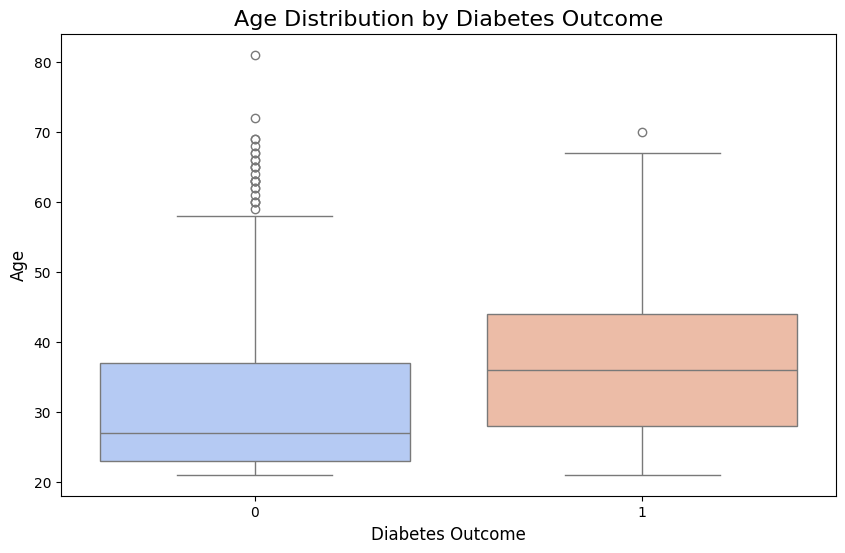

The boxplot shows the distribution of Age for individuals with and without diabetes. From this visualization, we can observe that individuals with diabetes tend to be older on average compared to those without diabetes. The median age for diabetic individuals is higher, indicating that age could be a contributing factor to the likelihood of developing diabetes.


In [71]:
#Visualization 1: to understand how age and glucose levels are distributed between individuals with and without diabetes.

#Set the size of the figure to 10 inches wide and 6 inches tall for better visibility
plt.figure(figsize=(10, 6))

#Create a boxplot for Age grouped by Diabetes Outcome
#'data=df': Use the DataFrame 'df' for the data
#'x='Outcome'': Set the x-axis to represent diabetes outcome (0 or 1)
#'y='Age'': Set the y-axis to represent the age of individuals
#'palette='coolwarm'': Use the "coolwarm" color palette for better visual distinction
sns.boxplot(data=df, x='Outcome', y='Age', palette='coolwarm')

#Add title and labels to the plot
plt.title('Age Distribution by Diabetes Outcome', fontsize=16)  # Title of the plot with font size 16
plt.xlabel('Diabetes Outcome', fontsize=12)  # Label for the x-axis with font size 12
plt.ylabel('Age', fontsize=12)  # Label for the y-axis with font size 12

#Show the plot
plt.show()

print ("The boxplot shows the distribution of Age for individuals with and without diabetes. From this visualization, we can observe that individuals with diabetes tend to be older on average compared to those without diabetes. The median age for diabetic individuals is higher, indicating that age could be a contributing factor to the likelihood of developing diabetes.")

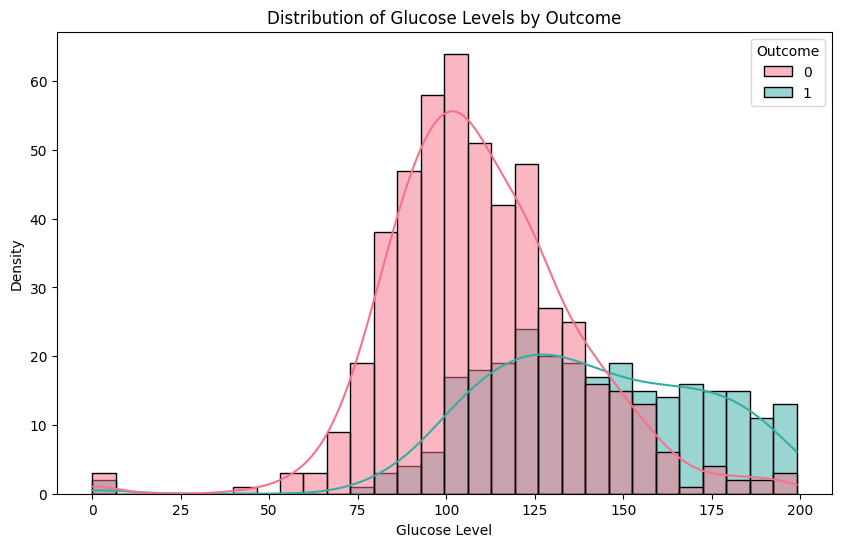

The second visualization shows the distribution of glucose levels for both diabetic (outcome=1) and non-diabetic (outcome=0) individuals. It reveals that individuals with diabetes tend to have higher glucose levels compared to non-diabetic individuals. This distribution helps in visualizing how glucose levels vary depending on the diabetes outcome.


In [72]:
#Set the size of the figure to 10 inches wide and 6 inches tall for better visibility
plt.figure(figsize=(10, 6))

#Create a histogram to show the distribution of glucose levels based on the outcome
#'data=df': Use the DataFrame 'df' for the data
#'x='Glucose'': Set the x-axis to represent glucose levels
#'hue='Outcome'': Color the histogram bars based on the outcome (0 or 1)
#'kde=True': Add a Kernel Density Estimate line to the histogram
#'palette="husl"': Use the "husl" color palette for better visual distinction
#'bins=30': Specify the number of bins to use in the histogram
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True, palette="husl", bins=30)

#Set the title of the plot
plt.title('Distribution of Glucose Levels by Outcome')

#Label the x-axis
plt.xlabel('Glucose Level')

#Label the y-axis
plt.ylabel('Density')

#Display the plot
plt.show()

print ("The second visualization shows the distribution of glucose levels for both diabetic (outcome=1) and non-diabetic (outcome=0) individuals. It reveals that individuals with diabetes tend to have higher glucose levels compared to non-diabetic individuals. This distribution helps in visualizing how glucose levels vary depending on the diabetes outcome.")

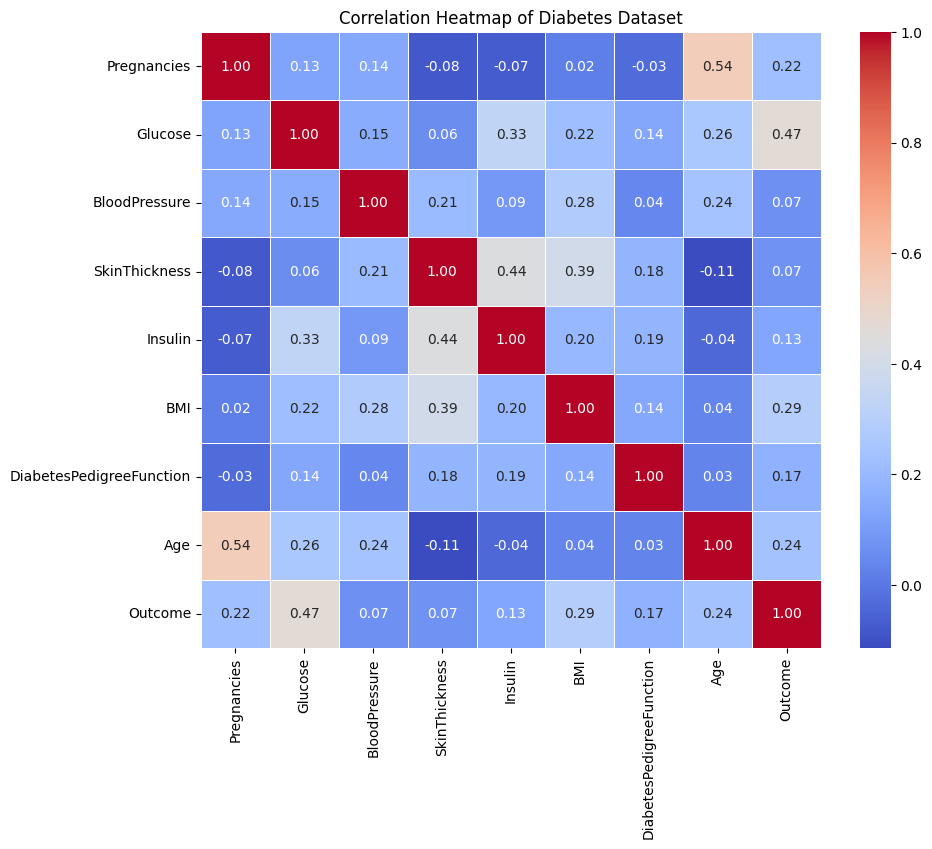

The heatmap shows the relationships between different features in the diabetes dataset. For example, glucose levels have a strong positive correlation with the outcome (whether a person has diabetes or not). The higher the correlation (closer to 1), the more strongly related the variables are. This is useful for identifying key factors contributing to diabetes.


In [73]:
#Set the size of the plot to 10x8 inches
plt.figure(figsize=(10, 8))

#Compute the correlation matrix, which shows the pairwise correlation between features in the dataset
correlation_matrix = df.corr()

#Create a heatmap to visualize the correlation matrix
#'annot=True' displays the correlation coefficients on the heatmap
#'cmap="coolwarm"' specifies the color palette, where warm colors represent high correlations and cool colors represent low correlations
#'fmt=".2f"' formats the correlation values to 2 decimal places
#'linewidths=0.5' adds lines between the squares of the heatmap for better readability
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

#Set the title of the heatmap
plt.title('Correlation Heatmap of Diabetes Dataset')

#Display the plot
plt.show()

print ("The heatmap shows the relationships between different features in the diabetes dataset. For example, glucose levels have a strong positive correlation with the outcome (whether a person has diabetes or not). The higher the correlation (closer to 1), the more strongly related the variables are. This is useful for identifying key factors contributing to diabetes.")

In [74]:
X = df.drop(['Outcome'], axis=1) #Create a variable X that contains all columns from the DataFrame df, except for the 'outcome' column
y = df['Outcome'] #Create a variable y that contains the 'outcome' column from the DataFrame df

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#To split the dataset into two parts: for training (80%) and for testing (20%).

In [76]:
#3
X_train.shape, X_test.shape #To show the number of rows and columns

((614, 8), (154, 8))

In [77]:
#Criterion Entropy
#instantiate the DecisionTreeClassifier model with criterion entropy
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#fit the model
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [78]:
#Use the trained decision tree classifier 'dt_en' to predict the labels for the test data 'X_test'
#The predictions will be stored in the variable 'y_pred_en'
y_pred_en = dt_en.predict(X_test)

In [79]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en))) #Print the accuracy result

Model accuracy score with criterion entropy: 0.7662


In [80]:
# Predict on the training set and calculate accuracy
# The model makes predictions on the training set 'X_train' and stores them in 'y_train_pred'
y_train_pred = dt_en.predict(X_train)

# Calculate the accuracy on the training set by comparing predicted labels to actual labels
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set and calculate accuracy
# The model makes predictions on the test set 'X_test' and stores them in 'y_test_pred'
y_test_pred = dt_en.predict(X_test)

# Calculate the accuracy on the test set by comparing predicted labels to actual labels
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print out the training and test accuracy with 4 decimal places
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Evaluate whether the model is overfitting or underfitting based on training and test accuracy
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")  # Higher training accuracy suggests overfitting
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")  # Equal accuracies suggest a good fit
else:
    print("The model might be underfitting.")  # Higher test accuracy suggests underfitting


Training accuracy: 0.7752
Test accuracy: 0.7662
The model might be overfitting.


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples

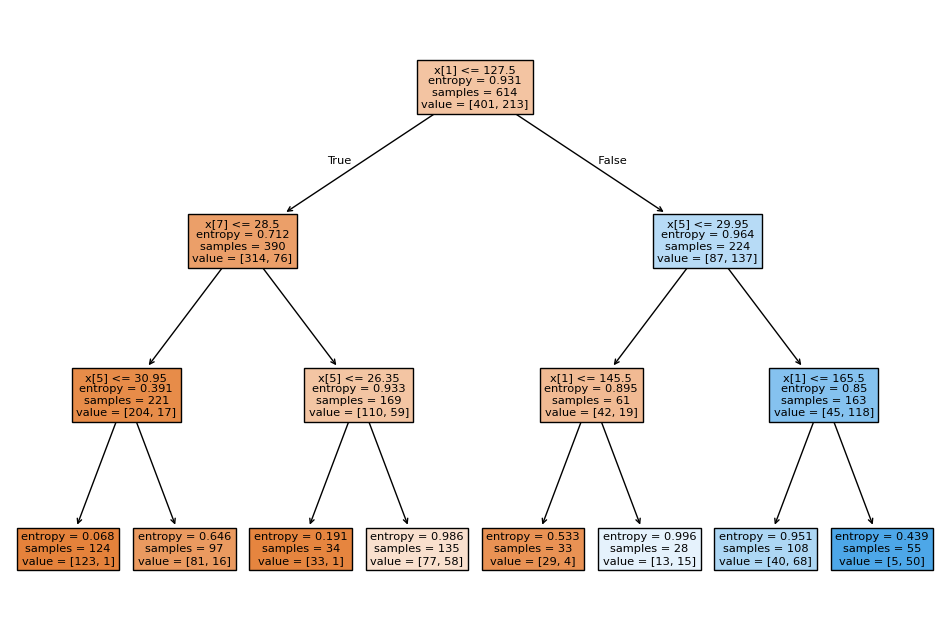

In [81]:
# Set the size of the plot to 12x8 inches for better visibility
plt.figure(figsize=(12, 8))

# Fit the decision tree model 'dt_en' to the training data 'X_train' and 'y_train'
# Then, plot the decision tree using the fitted model
# 'filled=True' fills the nodes with colors based on the class labels
tree.plot_tree(dt_en.fit(X_train, y_train), filled=True)

In [82]:
#Criterion Gini
#instantiate the DecisionTreeClassifier model with criterion gini index
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

#fit the model
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [83]:
#Use the trained decision tree classifier 'dt_gini' to predict the labels for the test data 'X_test'
#The predictions will be stored in the variable 'y_pred_gini'
y_pred_gini = dt_gini.predict(X_test)

In [84]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #To print the accuracy result

Model accuracy score with criterion gini: 0.7597


In [85]:
#Predict on the training set and calculate accuracy
#The model makes predictions on the training set 'X_train' and stores them in 'y_train_pred'
y_train_pred = dt_gini.predict(X_train)

#Calculate the accuracy on the training set by comparing predicted labels to actual labels
train_accuracy = accuracy_score(y_train, y_train_pred)

#Predict on the test set and calculate accuracy
#The model makes predictions on the test set 'X_test' and stores them in 'y_test_pred'
y_test_pred = dt_gini.predict(X_test)

#Calculate the accuracy on the test set by comparing predicted labels to actual labels
test_accuracy = accuracy_score(y_test, y_test_pred)

#Print out the training and test accuracy with 4 decimal places
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

#Evaluate whether the model is overfitting or underfitting based on training and test accuracy
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")  # Higher training accuracy suggests overfitting
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")  # Equal accuracies suggest a good fit
else:
    print("The model might be underfitting.")  # Higher test accuracy suggests underfitting

Training accuracy: 0.7769
Test accuracy: 0.7597
The model might be overfitting.


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(

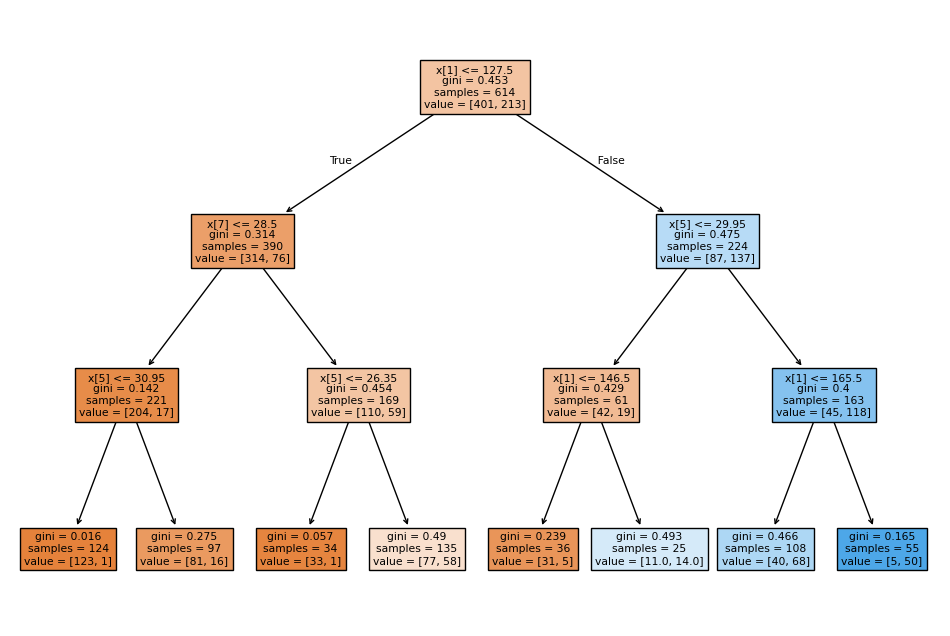

In [86]:
#Set the size of the plot to 12x8 inches for better visibility
plt.figure(figsize=(12, 8))

#Fit the decision tree model 'dt_gini' to the training data 'X_train' and 'y_train'
#Then, plot the decision tree using the fitted model
#'filled=True' fills the nodes with colors based on the class labels
tree.plot_tree(dt_gini.fit(X_train, y_train), filled=True)  #Create and display the tree

In [87]:
#Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

#Create the confusion matrix for predictions made by the decision tree using entropy
cm = confusion_matrix(y_test, y_pred_en)  # Calculate confusion matrix based on test labels and predicted labels
print("Confusion Matrix for Entropy-based Tree:\n", cm)

#Create the confusion matrix for predictions made by the decision tree using Gini Index
cm = confusion_matrix(y_test, y_pred_gini)  # Calculate confusion matrix based on test labels and predicted labels
print("Confusion Matrix for Gini-based Tree:\n", cm)

Confusion Matrix for Entropy-based Tree:
 [[83 16]
 [20 35]]
Confusion Matrix for Gini-based Tree:
 [[83 16]
 [21 34]]


In [88]:
print(classification_report(y_test, y_pred_en)) #To create and print the classification report
print(classification_report(y_test, y_pred_gini)) #To create and print the classification report

#Conclusion
#Both models show similar performance, with accuracy scores of 0.75 and 0.76, and only slight differences in precision, recall, and F1-score. The first model performs marginally better in terms of F1-score for class 1, while the second model shows slightly better overall accuracy. Given the small differences in performance, either model could be suitable, but the first model might be preferable if improving class 1 predictions is a priority.

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [89]:
# Naive Bayes
nb_classifier = GaussianNB() #To instantiate a Gaussian Naive Bayes object from the scikit-learn library.
nb_classifier.fit(X_train, y_train) #To train the created Naive Bayes model with the feature data X_train and label y_train.

GaussianNB()

In [90]:
nb_y_pred = nb_classifier.predict(X_test) #To predict the labels using the previously trained Naive Bayes model.

In [91]:
#Create the confusion matrix for the Naive Bayes model predictions
cm = confusion_matrix(y_test, nb_y_pred)  #Calculate confusion matrix based on test labels and predicted labels
print("Confusion Matrix for Naive Bayes:\n", cm)

#Display the accuracy score for the Naive Bayes model
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))  #Show the accuracy result

Confusion Matrix for Naive Bayes:
 [[79 20]
 [16 39]]
Accuracy Score: 0.7662


In [92]:
print(classification_report(y_test, nb_y_pred)) #To print the classification report

#Conclusion
#The classification report for this model shows an overall accuracy of 0.77. Class 0 performs better with a precision of 0.83, recall of 0.80, and F1-score of 0.81, while class 1 has a lower precision of 0.66 but a higher recall of 0.71 and an F1-score of 0.68. This model provides balanced performance between the two classes, with class 1 being slightly more effective in recall, indicating it catches more true positives but at the expense of lower precision.

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [93]:
#Logistic Regression

#Import the LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

#Create an instance of the Logistic Regression classifier
#'max_iter=200' sets the maximum number of iterations for the solver to converge
classifier = LogisticRegression(max_iter=200)

#Fit the logistic regression model to the training data
#The model learns the relationship between the features in 'X_train' and the target labels in 'y_train'
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [94]:
#Use the trained logistic regression classifier to predict the labels for the test data 'X_test'
y_pred_log = classifier.predict(X_test)

#Create a comparison table to show actual vs predicted labels
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})

#Display the first few rows of the comparison table
print(comparison_table.head())

     y_test  y_pred
668       0       0
324       0       0
624       0       0
690       0       0
473       0       0


In [95]:
#Calculate and print the accuracy score of the logistic regression model
#This compares the actual test labels 'y_test' with the predicted labels 'y_pred_log'
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))

Accuracy Score: 0.7468


In [96]:
#Create the confusion matrix for the logistic regression model predictions
cmatrix = confusion_matrix(y_test, y_pred_log)  # Calculate confusion matrix based on test labels and predicted labels

#Print the confusion matrix
print("Confusion Matrix:\n", cmatrix)

Confusion Matrix:
 [[78 21]
 [18 37]]


In [97]:
#Print the classification report for the logistic regression model predictions
#This report includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred_log))

#Conclusion
#The logistic regression model has an overall accuracy of 0.75. It performs better for class 0, with a precision of 0.81, recall of 0.79, and an F1-score of 0.80, while class 1 has lower precision at 0.64, recall at 0.67, and an F1-score of 0.65. The model seems balanced overall, but it struggles more with class 1 predictions, as seen by the lower performance metrics compared to class 0.

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

